The goal of this project is to predict the probability of a customer likely to churn using machine learning techniques

The customer churn, also known as customer attrition, refers to the phenomenon whereby a customer leaves a company. Some studies confirmed that acquiring new customers can cost five times more than satisfying and retaining existing customers. As a matter of fact, there are a lot of benefits that encourage the tracking of the customer churn rate, for example:

Marketing costs to acquire new customers are high. Therefore, it is important to retain customers so that the initial investment is not wasted;
It has a direct impact on the ability to expand the company;
etc.
In this project our goal is to predict the probability of a customer is likely to churn using machine learning techniques.

In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py
import itertools 
##making sure warnings are not disploayed in the console
import warnings 
warnings.filterwarnings('ignore')
import os 
import io
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls 
import plotly.figure_factory as ff

%matplotlib inline 

In [38]:
data1=pd.read_csv('Churn_Modelling.csv')
data1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
data['Geography'].value_counts()

1    5014
0    4986
Name: Geography, dtype: int64

In [3]:
data1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
data1.shape

(10000, 14)

In [5]:
##remove irrelevant variables 
data=data1.drop(['RowNumber','CustomerId','Surname'], axis=1)

EDA

In [6]:
#view database information including shape, type and descript name. etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
#count the number of unique values for each descriptor 
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [8]:
##desribe all the statistical properties of the data 
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
##datatype of each column
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

EDA

Now that we have preprocessed the data by removing unnecessary information from it, we can start an exploratory analysis to find possible correlations between different features (columns) of the data and resulting outcomes (possibly one data column). We will analyze each and every possible column in the data to measure its eligibility to be a valuable feature for the exit criteria of any customer.

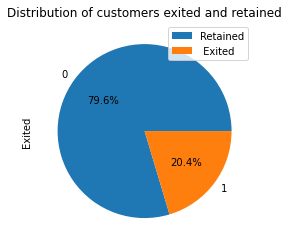

In [11]:
# Pie chart to display the amount (percentage) of customers churned and the ones retained
plt.title('Distribution of customers exited and retained')
data['Exited'].value_counts().plot.pie(autopct='%1.1f%%')
legend=('Retained', ' Exited')
plt.legend(legend)
plt.show()



From the given data, it is visible that around 20% of the people have exited or churned. So, we can try to create a machine learning model that can predict whether a customer will exit the bank or not given his/her banking data.

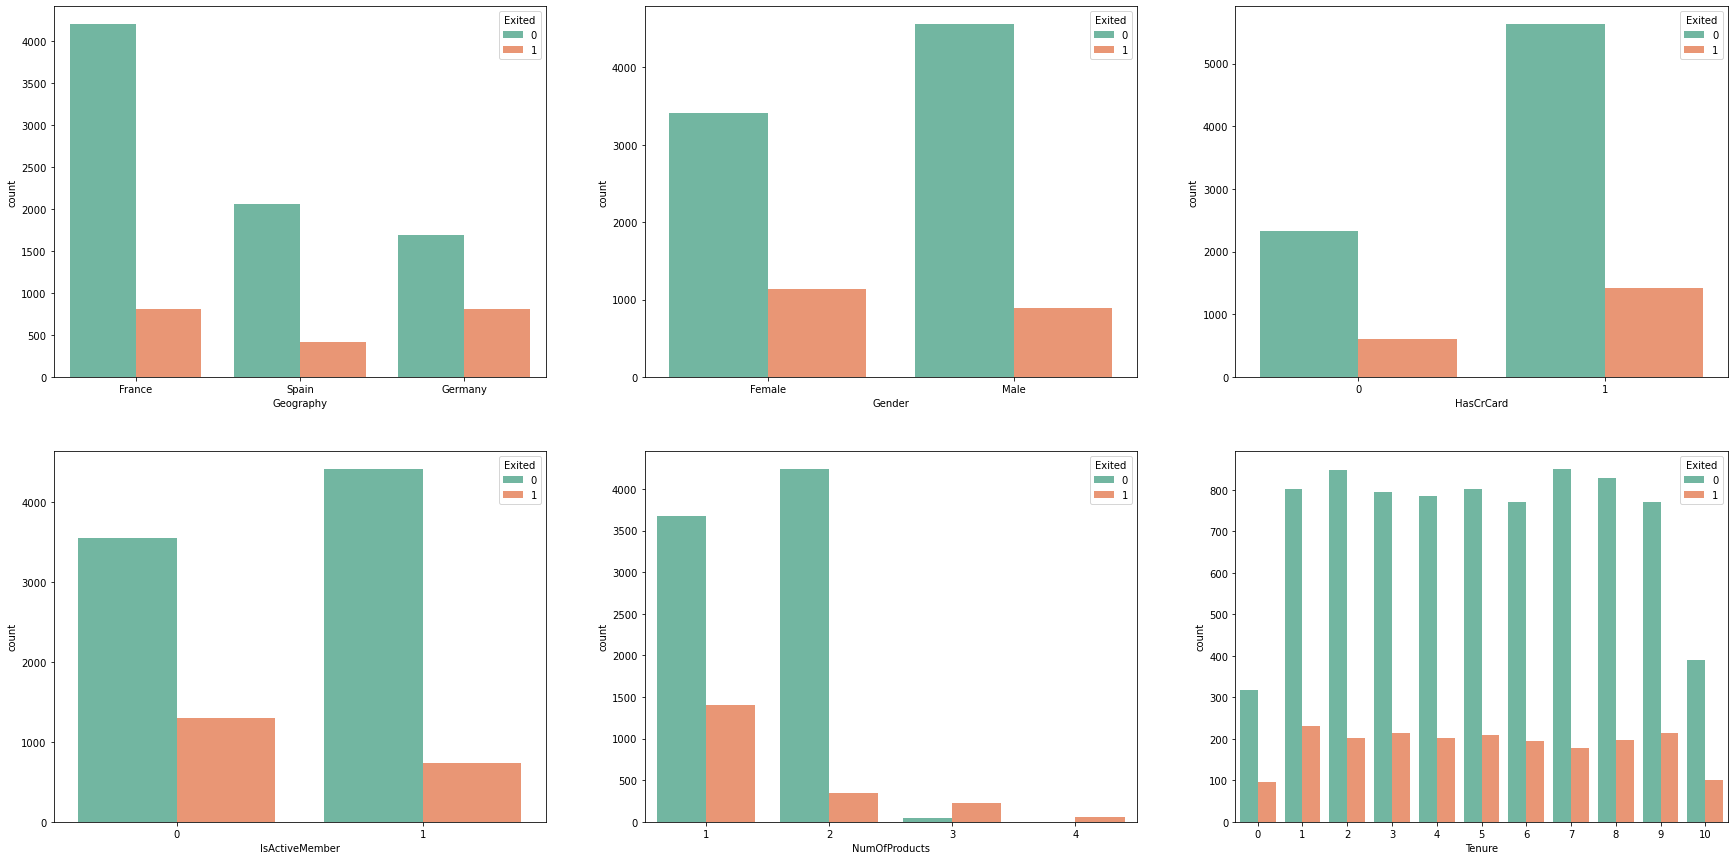

In [12]:
# Count column plots to map the dependence of 'Exited' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Geography', hue='Exited', data=data, palette='Set2', ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=data, palette='Set2', ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=data, palette='Set2', ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited', data=data, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=data, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=data, palette='Set2', ax=ax[1][2])

plt.show()

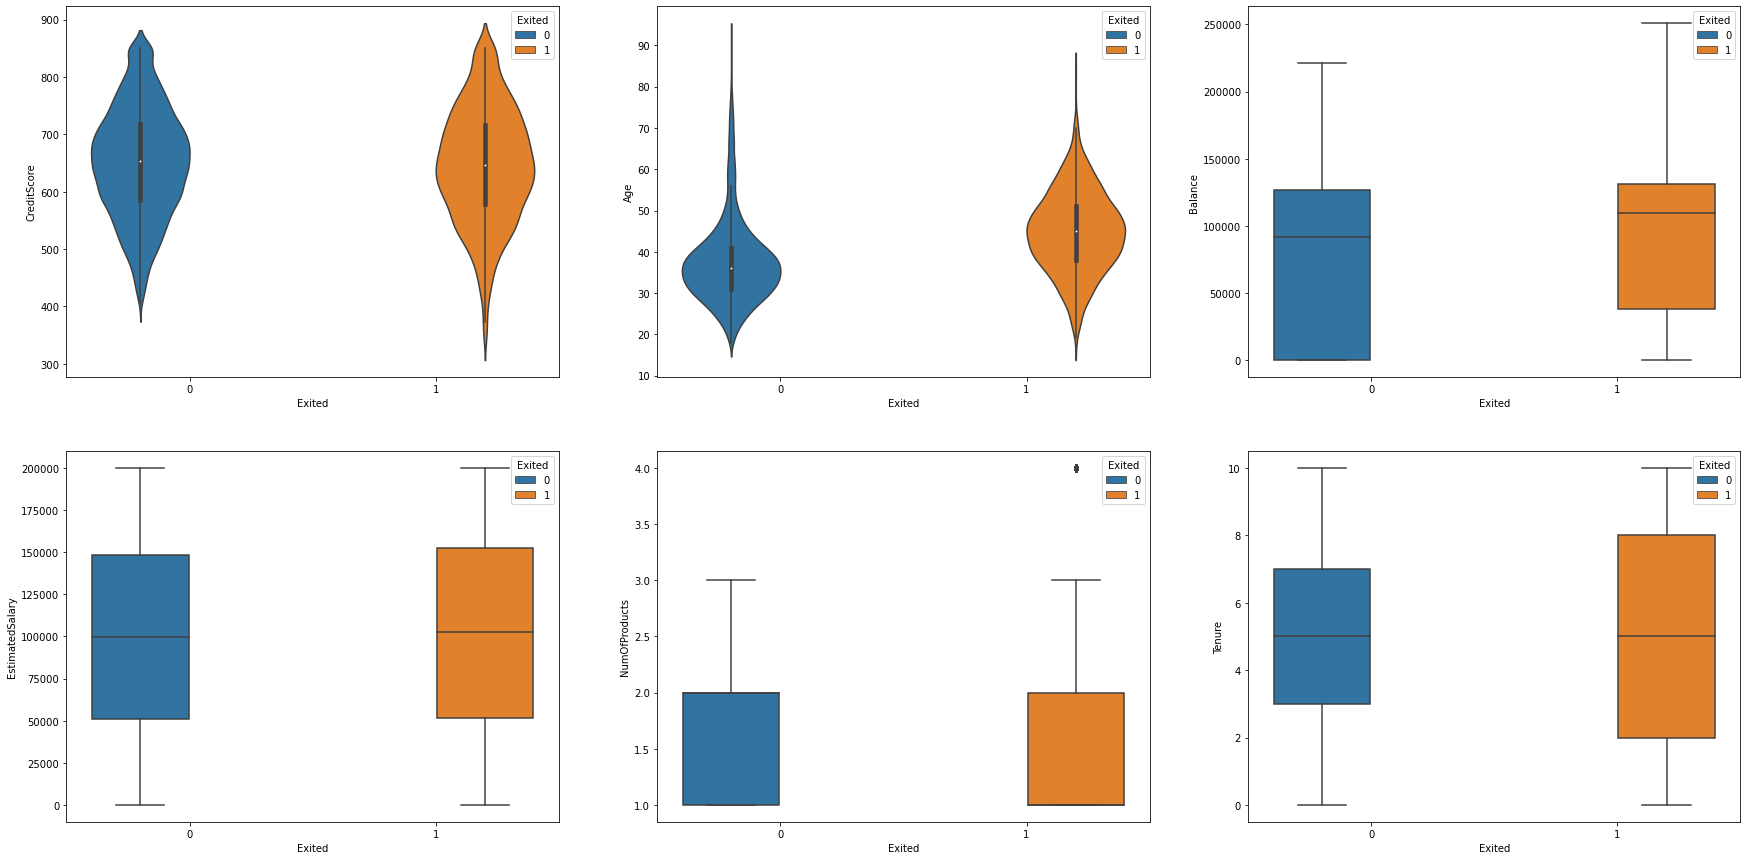

In [13]:
# Count column plots to map the dependence of 'Exited' column on continuous and numerical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.violinplot(data=data, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.violinplot(data=data, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=data, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=data, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=data, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=data, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

plt.show()

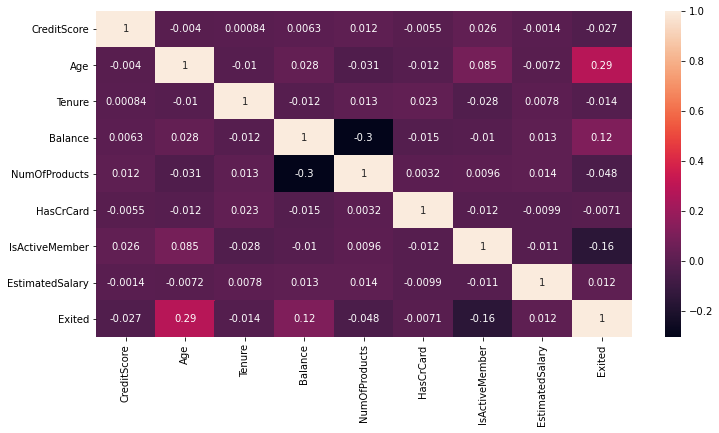

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.show()
##there is no significant relationship between the variables 

In [15]:
from sklearn.preprocessing import OneHotEncoder
data['Geography']=pd.get_dummies(data['Geography'])
data['Gender']=pd.get_dummies(data['Gender'])

MACHINE LEARNING 


In [16]:
X=data.iloc[:,0:10]
y=data.iloc[:,10]

In [17]:
#importing libraries for prediction
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import xgboost
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print('X Test:',X_test.shape)
print('X Train:',X_train.shape)

X Test: (3000, 10)
X Train: (7000, 10)


In this section, we are implementing code that will give us an idea of how our trained models perform on the test data. We use Accuracy metrics and AUC-ROC score during this process.

Why ROC as metric?

(ROC) is frequently used to evaluate the performance of binary classification algorithms. It provides a graphical representation of a classifier's performance, rather than a single value like most other metrics.

One advantage of ROC curves is that they help us find a classification threshold that suits our specific problem. Moreover, ROC curves and AUC scores also allow us to compare the performance of different classifiers for the same problem.

LOGISTIC REGRESSION

In [19]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(classification_report(lr_pred,y_test))
lr_roc_score=roc_auc_score(lr_pred,y_test)
print(lr_roc_score)

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      2890
           1       0.08      0.44      0.14       110

    accuracy                           0.80      3000
   macro avg       0.53      0.63      0.51      3000
weighted avg       0.94      0.80      0.86      3000

0.6254482541679773


RANDOM FOREST

In [20]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(classification_report(rf_pred,y_test))
rf_roc_score=roc_auc_score(rf_pred,y_test)
print(rf_roc_score)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2658
           1       0.43      0.74      0.55       342

    accuracy                           0.86      3000
   macro avg       0.70      0.81      0.73      3000
weighted avg       0.90      0.86      0.87      3000

0.8076181801380804


ADABOOST CLASSIFIER

In [21]:
ada=AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
print(classification_report(ada_pred,y_test))
ada_roc_score=roc_auc_score(ada_pred,y_test)
print(ada_roc_score)

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2613
           1       0.47      0.71      0.56       387

    accuracy                           0.86      3000
   macro avg       0.71      0.79      0.74      3000
weighted avg       0.89      0.86      0.87      3000

0.7932030366948798


XGBOOST CLASSIFIER

In [22]:
xgb=xgboost.XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
xgb_roc_score=roc_auc_score(xgb_pred,y_test)
print(xgb_roc_score)

[08:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7927245650357779


GRADIENT BOOSTING

In [23]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(classification_report(gb_pred,y_test))
gb_roc_score=roc_auc_score(gb_pred,y_test)
print(gb_roc_score)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2658
           1       0.46      0.79      0.58       342

    accuracy                           0.87      3000
   macro avg       0.72      0.83      0.75      3000
weighted avg       0.91      0.87      0.88      3000

0.8340197747943977


KNN

In [24]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)
print(classification_report(kn_pred,y_test))
kn_roc_score=roc_auc_score(kn_pred,y_test)
print(kn_roc_score)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      2788
           1       0.09      0.25      0.14       212

    accuracy                           0.77      3000
   macro avg       0.51      0.53      0.50      3000
weighted avg       0.88      0.77      0.82      3000

0.5323082753580033


NAIVE BAYES

In [25]:
#using the naive bayes 
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb_pred=nb.predict(X_test)
nb_roc_score=roc_auc_score(nb_pred,y_test)
#Evaluation
print('classification report',classification_report(nb_pred,y_test))
print('ROC:', roc_auc_score(nb_pred,y_test)*100)
nb.get_params()

classification report               precision    recall  f1-score   support

           0       0.97      0.81      0.88      2875
           1       0.08      0.35      0.12       125

    accuracy                           0.79      3000
   macro avg       0.52      0.58      0.50      3000
weighted avg       0.93      0.79      0.85      3000

ROC: 58.208695652173915


{'priors': None, 'var_smoothing': 1e-09}

In [26]:
models=['Logistic Regression', 'Random Forest','XGBoost', 'KNN','Ada Boost','Gradient Boosting', 'Naive Bayes']
roc=[lr_roc_score, rf_roc_score, xgb_roc_score, kn_roc_score, ada_roc_score, gb_roc_score, nb_roc_score]
pd.DataFrame(roc, index=models)

,0
Logistic Regression,0.625448
Random Forest,0.807618
XGBoost,0.792725
KNN,0.532308
Ada Boost,0.793203
Gradient Boosting,0.834020
Naive Bayes,0.582087


From the above table, we can clearly see that the Random Forest (RF) classifier has the highest ROC score (0.81) and hence have the highest area under curve as well. Let'sperform model optimization to see if we can increase our accuracy. x

In [27]:
features_label=X.columns
importances=rf.feature_importances_
indices=(np.argsort(importances)[::-1])
for i in range(X.shape[1]):
    print((i+1, 30, features_label[i], importances[indices[i]]))
indices

(1, 30, 'CreditScore', 0.24071820489337287)
(2, 30, 'Geography', 0.15279595245328811)
(3, 30, 'Gender', 0.14656982966287568)
(4, 30, 'Age', 0.14244045625680418)
(5, 30, 'Tenure', 0.13022077655595493)
(6, 30, 'Balance', 0.08259481762529186)
(7, 30, 'NumOfProducts', 0.04386119444579629)
(8, 30, 'HasCrCard', 0.020802918586653597)
(9, 30, 'IsActiveMember', 0.020007157462693402)
(10, 30, 'EstimatedSalary', 0.01998869205726904)


array([3, 9, 0, 5, 6, 4, 8, 1, 2, 7], dtype=int64)

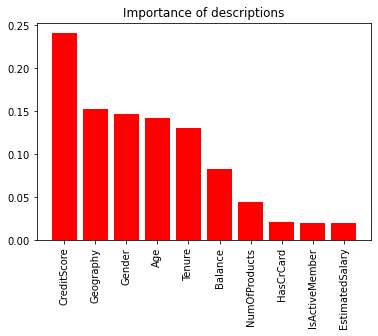

In [28]:
plt.title('Importance of descriptions')
plt.bar(range(X.shape[1]),importances[indices], color='red', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.show()

In [ ]:
The major predictors of a customer churning are, credit score, geography, gender, age, tenure etc.

MODEL OPTIMIZATION 
 Implementation of cross-validation

In [29]:
from sklearn.model_selection import cross_val_score

# Function which gives as output the roc_auc measurement plus the standard deviation (STD)
def cvDict(functions, X_train, y_train, cv, scr):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        print('\n', str(func).split('(')[0],':', cvScore)
        cvDict[str(func).split('(')[0]] = [round(cvScore.mean(),2), cvScore.std()]
        
    return cvDict

In [30]:
models = [ada, gb, xgb, rf]
print(' Roc_auc score for a cv = 5')
cvD = cvDict(models, X_train, y_train, 5, scr ='roc_auc')
print('\n','='*100, '\n')
print('Average Score plus STD for each model')
cvD

 Roc_auc score for a cv = 5

 AdaBoostClassifier : [0.81383185 0.84762285 0.83830205 0.83758155 0.81742777]

 GradientBoostingClassifier : [0.84718439 0.86237718 0.86888439 0.85544734 0.84246816]
[08:07:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:07:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective '

{'AdaBoostClassifier': [0.83, 0.013052937557017374],
 'GradientBoostingClassifier': [0.86, 0.009645300241813306],
 'XGBClassifier': [0.83, 0.01005850788479607],
 'RandomForestClassifier': [0.85, 0.009494890812173655]}

As we can see, in the output above, Random forest, GradietBoosting, Xgboost, and Adaboost are performing well. This cross-validation score helps us to decide which model we should select and which we should not go with. From the, we can clearly see that the Gradient Boosting (RF) classifier has the highest ROC score (86%) and hence have the highest accuracy. From this, we finally choose theGradient Boosting classifier with its optimal parameters as our final machine learning classifier model. Based on the average value of ROC_AUC and the value of the standard deviation, we can conclude that the ROC_AUC score does not deviate much for most models (models do not suffer from the overfitting problem).

In this project, I worked on models that predict the likelihood that a customer will churn or not. During exploratory data analysis, I found that majority of the churning comes from Germany i.e (customers located in Germany are the most unsubscribed),  Female customers had more exits than the male customers,  people who have credit cards have more exits than those who do not own credit cards, inactive members churns more than members who are active, the older customers are more likely to be churned from the bank. customers who own more products from the bank are likely to be retained for a longer time than those who own less products.  estimated salary and number of products also does not seem to affect the customer churn.  After using multiple models I ended up with three models (GradientBoosting, xgboost, and AdaBoost) that performed better than other Random Forestl and other ML models. I decided to go further with the three and set up a voting system for the three which will allow me to choose the best model. Since the issue is with binary classification with an imbalance database, I used the most efficient metric for model performance which is ROC-AUC score and my model hit about $86%$ "Accuracy".

In [32]:
import pickle
file=open('BankChurnGB.pkl','wb')
#dump the file 
pickle.dump(gb,file)
model=pickle.load(open('BankChurnGB.pkl','rb'))